In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, UpSampling2D, Dense, MaxPool2D, LeakyReLU, Reshape, Dropout, Flatten, GaussianNoise, Embedding, multiply, concatenate, add
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import time
import pickle

In [3]:
def normalize_img(img):
    return (img - 127.5)/127.5

def unnormalize_img(img):
    return (img + 1.) / 2.

In [8]:
def load_image_caption_dict():
    caption_dict = None
    with open('./bert/embeddedcaptions.pickle', 'rb') as f:
        return pickle.load(f)
    
caption_dict = load_image_caption_dict()

In [12]:
caption_dict.keys()

dict_keys(['Black_Footed_Albatross_0001_796111.txt', 'Black_Footed_Albatross_0002_55.txt', 'Black_Footed_Albatross_0003_796136.txt', 'Black_Footed_Albatross_0005_796090.txt', 'Black_Footed_Albatross_0006_796065.txt', 'Black_Footed_Albatross_0007_796138.txt', 'Black_Footed_Albatross_0008_796083.txt', 'Black_Footed_Albatross_0009_34.txt', 'Black_Footed_Albatross_0010_796097.txt', 'Black_Footed_Albatross_0014_89.txt', 'Black_Footed_Albatross_0016_796067.txt', 'Black_Footed_Albatross_0017_796098.txt', 'Black_Footed_Albatross_0019_796104.txt', 'Black_Footed_Albatross_0023_796059.txt', 'Black_Footed_Albatross_0024_796089.txt', 'Black_Footed_Albatross_0025_796057.txt', 'Black_Footed_Albatross_0026_796095.txt', 'Black_Footed_Albatross_0031_100.txt', 'Black_Footed_Albatross_0032_796115.txt', 'Black_Footed_Albatross_0033_796086.txt', 'Black_Footed_Albatross_0035_796140.txt', 'Black_Footed_Albatross_0036_796127.txt', 'Black_Footed_Albatross_0037_796120.txt', 'Black_Footed_Albatross_0038_212.txt',

In [88]:
train_imgs = []
train_classes = []
train_captions = []
class_index = 0
import os
for root, dirs, files in os.walk("./CUB_200_2011/CUB_200_2011/images-cleaned-named/", topdown=False):
    print(f'{len(files)} samples in class {class_index}, ({root})')
    for name in files:
        train_imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, name)), cv2.COLOR_RGB2BGR))
        train_classes.append(class_index)
        train_captions.append(caption_dict[name.split('.')[0]+'.txt'][0]) # Just using the first of 10 captions for now
    class_index += 1
train_imgs = np.array(train_imgs)
train_imgs = (train_imgs - 127.5)/127.5
train_imgs = train_imgs.astype(np.float32)
train_classes = np.array(train_classes)
train_captions = np.array(train_captions)

60 samples in class 0, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/001.Black_footed_Albatross)
60 samples in class 1, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/002.Laysan_Albatross)
58 samples in class 2, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/003.Sooty_Albatross)
60 samples in class 3, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/004.Groove_billed_Ani)
44 samples in class 4, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/005.Crested_Auklet)
41 samples in class 5, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/006.Least_Auklet)
53 samples in class 6, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/007.Parakeet_Auklet)
48 samples in class 7, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/008.Rhinoceros_Auklet)
59 samples in class 8, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/009.Brewer_Blackbird)
60 samples in class 9, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/010.Red_winged_Blackbird)
60 samples in class 10, (./CUB_200_2011/CUB_20

60 samples in class 94, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/095.Baltimore_Oriole)
60 samples in class 95, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/096.Hooded_Oriole)
59 samples in class 96, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/097.Orchard_Oriole)
60 samples in class 97, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/098.Scott_Oriole)
60 samples in class 98, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/099.Ovenbird)
60 samples in class 99, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/100.Brown_Pelican)
50 samples in class 100, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/101.White_Pelican)
60 samples in class 101, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/102.Western_Wood_Pewee)
60 samples in class 102, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/103.Sayornis)
60 samples in class 103, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/104.American_Pipit)
49 samples in class 104, (./CUB_200_2011/CUB_200_2011/images-cleane

58 samples in class 189, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/190.Red_cockaded_Woodpecker)
60 samples in class 190, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/191.Red_headed_Woodpecker)
60 samples in class 191, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/192.Downy_Woodpecker)
60 samples in class 192, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/193.Bewick_Wren)
60 samples in class 193, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/194.Cactus_Wren)
60 samples in class 194, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/195.Carolina_Wren)
59 samples in class 195, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/196.House_Wren)
60 samples in class 196, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/197.Marsh_Wren)
60 samples in class 197, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/198.Rock_Wren)
60 samples in class 198, (./CUB_200_2011/CUB_200_2011/images-cleaned-named/199.Winter_Wren)
60 samples in class 199, (./CUB_200_2011/CUB_200_2011/i

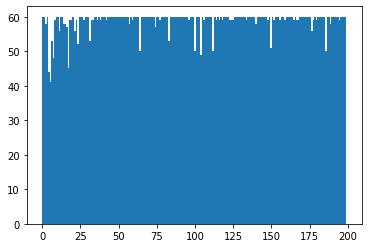

(11788, 64, 64, 3)


In [5]:
plt.hist(train_classes, bins=200)
plt.show()
assert(len(train_imgs) == len(train_classes))
print(train_imgs.shape)

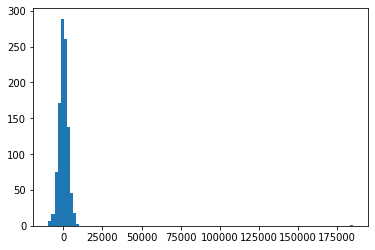

929
18.448483


In [33]:
plt.hist(np.sum(train_captions, axis=0), bins=100)
plt.show()
print(np.argmax(np.sum(train_captions, axis=0)))
print(train_captions[2786][929])

In [34]:
def create_simple_attrs(attrs):
    # Structure is like so: [0-14:color, 15-19:size, 20-33:shape]

    simple_attrs = np.zeros((attrs.shape[0], 34))
    
    # Color
    simple_attrs[:, 0:15] = attrs[:, 248:263]
    
    # Size and shape
    simple_attrs[:, 15:34] = attrs[:, 217:236]
    
    return simple_attrs


In [35]:
def create_even_simpler_attrs(attrs):
    # Structure is like so: [0-4:color, 5-7:size, 8-9:shape]
    
    simplest_attrs = np.zeros((attrs.shape[0], 10))
    
    simplest_attrs[:, 0] = attrs[:, 1] # Brown
    simplest_attrs[:, 1] = attrs[:, 5] # Grey
    simplest_attrs[:, 2] = attrs[:, 11] # Black
    simplest_attrs[:, 3] = attrs[:, 12] # White
    simplest_attrs[:, 4] = np.clip(np.sum(attrs[:, [0, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14]], axis=1), a_min=0, a_max=1) # Other
    
    simplest_attrs[:, 5] = attrs[:, 19] # Smallest
    simplest_attrs[:, 6] = attrs[:, 16] # Small
    simplest_attrs[:, 7] = np.clip(np.sum(attrs[:, [15, 17, 18]], axis=1), a_min=0, a_max=1) # Large
    
    simplest_attrs[:, 8] = attrs[:, 33] # Perching-like
    simplest_attrs[:, 9] = np.clip(np.sum(attrs[:, [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]], axis=1), a_min=0, a_max=1) # Not perching-like
    
    return simplest_attrs

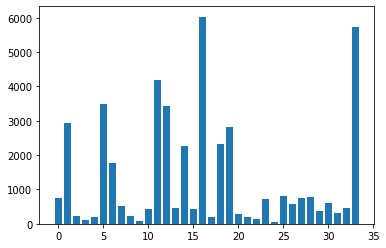

In [36]:
def load_image_attributes():
    train_attrs = np.zeros((train_imgs.shape[0], 312))
    with open('./CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            
            # For now we don't care about attribute certainty, just if it is present.
            try:
                split = line.split()
                img_id = int(split[0])
                assert(img_id > 0)
                assert(img_id <= 11788)
                attr_id = int(split[1])
                assert(attr_id > 0)
                assert(attr_id <= 312)
                is_present = int(split[2])
                assert(is_present == 0 or is_present == 1)
            except: 
                print(line)
                print(line.split())
                return
            
            train_attrs[img_id-1, attr_id-1] = is_present
    return train_attrs

train_attrs = load_image_attributes().astype('float32')
train_attrs = create_simple_attrs(train_attrs)
plt.bar([x for x in range(34)], np.sum(train_attrs, axis=0))
plt.show()
train_attrs = create_even_simpler_attrs(train_attrs)
train_attrs = train_attrs.astype(np.float32)

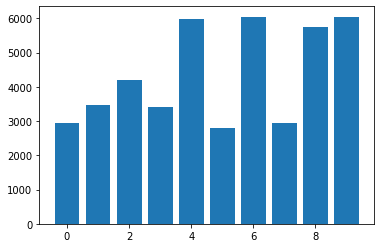

4358.4
1349.5349


In [38]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))
plt.show()
sum_attrs = np.sum(train_attrs, axis=0)

print(np.mean(sum_attrs))
print(np.std(sum_attrs))
# np.argmin(sum_attrs)

In [54]:
def make_generator_model(shape):
    
    noise_in = Input(shape=shape)
    captions_in = Input(shape=(1024,))
    
    c = Dense(300)(captions_in)
    
    input_layer = multiply([noise_in, c])
    
    x = Dense(16*16*64*2)(input_layer)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Reshape((16, 16, 128))(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = GaussianNoise(1)(x)
    x = Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    
    x = Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)
    
    return Model([noise_in, captions_in], x)

In [55]:
generator = make_generator_model((300,))
generator.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 1024)]       0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 300)          307500      input_16[0][0]                   
__________________________________________________________________________________________________
multiply_5 (Multiply)           (None, 300)          0           input_15[0][0]                   
                                                                 dense_5[0][0]              

(1024,)


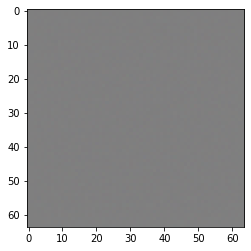

In [56]:
generator = make_generator_model((300,))

noise = np.random.normal(0, 1, 300)
label = train_captions[0]
print(label.shape)

generated_image = generator.predict( [np.array([noise]), np.array([label])] )[0]
plt.imshow(unnormalize_img(generated_image), )

In [57]:
def make_valid_discriminator_model():
    input_layer = Input((64, 64, 3))
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='valid')(input_layer)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    
    x = Flatten()(x)
    x = Dense(64)(x) 
    x = LeakyReLU()(x)
    x = Dropout(0.3)(x)
    
    valid = Dense(1, activation='sigmoid')(x)
    
    return Model(input_layer, valid)

In [58]:
discriminator_valid = make_valid_discriminator_model()
discriminator_valid.summary()
valid = discriminator_valid.predict(np.array([generated_image]))


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
valid (Conv2D)               (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0   

In [91]:
def make_attr_discriminator_model():
    input_layer = Input((64, 64, 3))
    
#     x = GaussianNoise(1)(input_layer)
    
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same', name='attr')(input_layer)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)

    
    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)


#     x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
#     x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Flatten()(x)
    x = Dense(64)(x)
#     x = Dense(128)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    x = Dense(48)(x)
#     x = Dense(64)(x)
    x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
    
    attr = Dense(10, activation='sigmoid')(x)
    
    return Model(input_layer, attr)

In [92]:
discriminator_attr = make_attr_discriminator_model()
discriminator_attr.summary()
attrs = discriminator_attr.predict(np.array([generated_image]))

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
attr (Conv2D)                (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_78 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_79 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_80 (LeakyReLU)   (None, 16, 16, 128)       0  

In [61]:
cross_entropy = BinaryCrossentropy(from_logits=False)

@tf.function
def discriminator_valid_loss(real_output, fake_output, flip):
    
    if flip:
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.9, maxval=1.0)
        real_labels = tf.random.uniform(real_output.shape, minval=0.0, maxval=0.1)
    else:
        real_labels = tf.random.uniform(real_output.shape, minval=0.9, maxval=1.0)
        fake_labels = tf.random.uniform(fake_output.shape, minval=0.0, maxval=0.1)

        
    real_loss = cross_entropy(real_labels, real_output)
    fake_loss = cross_entropy(fake_labels, fake_output)
    total_loss = real_loss + fake_loss
    return total_loss, real_loss, fake_loss

In [62]:
# mse = MeanSquaredError()

@tf.function
def discriminator_attribute_loss_real(real_output, real_attributes):
    return cross_entropy(real_output, real_attributes)

@tf.function
def discriminator_attribute_loss_fake(fake_output, fake_attributes):
    return cross_entropy(fake_output, fake_attributes)

In [63]:
@tf.function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def generator_attr_loss(fake_attr_output, sampled_attrs):
#     tf.print(fake_attr_output[0], summarize=10)
#     tf.print(sampled_attrs[0], summarize=10, end='\n\n')
    return cross_entropy(fake_attr_output, sampled_attrs)

In [119]:
@tf.function
def train_step(images, attrs, sampled_attrs, sampled_captions, flip, warmup):
    noise = tf.random.truncated_normal([32, 300], dtype=tf.dtypes.float64)
    
#     sampled_attrs = tf.cast(tf.random.uniform([32, 312], minval=0, maxval=2, dtype='int32'), 'float32') # Need to make this smarter. Only one 1 per attr.
#     attrs = tf.reshape(attrs, (attrs.shape[0], 1))
    
    gen_losses = []
    gen_valid_losses = []
    gen_attr_losses = []
    disc_losses = []
    disc_real_losses = []
    disc_fake_losses = []
    disc_attr_real_losses = []
    disc_attr_fake_losses = []

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape_valid, tf.GradientTape() as disc_tape_attr:
        gen_tape.watch(generator.trainable_variables)
        disc_tape_valid.watch(discriminator_valid.trainable_variables)
        disc_tape_attr.watch(discriminator_attr.trainable_variables)
        
        generated_images = generator([noise, sampled_captions], training=True)
        
        real_output = discriminator_valid(images, training=True)
        fake_output = discriminator_valid(generated_images, training=True)
        
        real_attr_output = discriminator_attr(images, training=True)
        fake_attr_output = discriminator_attr(generated_images, training=True)
        
        gen_valid_loss = generator_loss(fake_output)
        gen_attr_loss = generator_attr_loss(fake_attr_output, sampled_attrs)
        gen_loss = ((2.0 - warmup) * gen_valid_loss + (warmup * gen_attr_loss))
        
        disc_valid_loss, disc_real_loss, disc_fake_loss = discriminator_valid_loss(real_output, fake_output, flip)
        disc_attr_real_loss = discriminator_attribute_loss_real(real_attr_output, attrs)
        disc_attr_fake_loss = discriminator_attribute_loss_fake(fake_attr_output, sampled_attrs)
        disc_attr_loss = ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
#         disc_loss += ((2.0 - warmup) * disc_attr_real_loss + warmup * disc_attr_fake_loss)
        
        
        gen_losses.append(K.mean(gen_loss))
        gen_valid_losses.append(K.mean(gen_valid_loss))
        gen_attr_losses.append(K.mean(gen_attr_loss))
        disc_losses.append(K.mean(disc_valid_loss))
        disc_real_losses.append(K.mean(disc_real_loss))
        disc_fake_losses.append(K.mean(disc_fake_loss))
        disc_attr_real_losses.append(K.mean(disc_attr_real_loss))
        disc_attr_fake_losses.append(K.mean(disc_attr_fake_loss))
    
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    gradients_of_discriminator_valid = disc_tape_valid.gradient(disc_valid_loss, discriminator_valid.trainable_variables)
    
    gradients_of_discriminator_attr = disc_tape_attr.gradient(disc_attr_loss, discriminator_attr.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    
    discriminator_valid_optimizer.apply_gradients(zip(gradients_of_discriminator_valid, discriminator_valid.trainable_variables))
    
    discriminator_attr_optimizer.apply_gradients(zip(gradients_of_discriminator_attr, discriminator_attr.trainable_variables))

    return (gen_losses, gen_valid_losses, gen_attr_losses, disc_losses, disc_real_losses, disc_fake_losses, disc_attr_real_losses, disc_attr_fake_losses)

In [80]:
def train(train_imgs, train_attrs, train_captions, epochs, warmup):
    gen_loss_all = []
    gen_valid_loss_all = []
    gen_attr_loss_all = []
    disc_loss_all = []
    disc_loss_real_all = []
    disc_loss_fake_all = []
    disc_attr_loss_real_all = []
    disc_attr_loss_fake_all = []
    warmup_step = 1./2000.
    
    num_samples = len(train_imgs)
    batch_counter = 0
    
    for epoch in range(epochs):
        start = time.time()
        
        gen_loss_epoch = [1, 0]
        gen_valid_loss_epoch = [1, 0]
        gen_attr_loss_epoch = [1, 0]
        disc_loss_epoch = [1, 0]
        disc_loss_real_epoch = [1, 0]
        disc_loss_fake_epoch = [1, 0]
        disc_attr_loss_real_epoch = [1, 0]
        disc_attr_loss_fake_epoch = [1, 0]
        
        seed = np.random.randint(0, 10000)
        np.random.seed(seed)
        np.random.shuffle(train_imgs)
        np.random.seed(seed)
        np.random.shuffle(train_attrs)
        
        for idx, i in enumerate(range(0, num_samples - 32, 32)):
            
            gen_loss_batch, gen_valid_loss_batch, gen_attr_loss_batch, disc_loss_batch, disc_loss_real_batch, disc_loss_fake_batch, disc_attr_loss_real_batch, disc_attr_loss_fake_batch = train_step(train_imgs[i:(i+32)], train_attrs[i:(i+32)], train_attrs[np.random.choice(range(len(train_attrs)), 32, replace=False)], train_captions[np.random.choice(range(len(train_captions)), 32, replace=False)], batch_counter % 20 == 0, tf.constant(warmup, dtype='float32'))

            gen_loss_epoch[0] += 1
            gen_valid_loss_epoch[0] += 1
            gen_attr_loss_epoch[0] += 1
            disc_loss_epoch[0] += 1
            disc_loss_real_epoch[0] += 1
            disc_loss_fake_epoch[0] += 1
            disc_attr_loss_real_epoch[0] += 1
            disc_attr_loss_fake_epoch[0] += 1
            gen_loss_epoch[1] += np.mean(gen_loss_batch)
            gen_valid_loss_epoch[1] += np.mean(gen_valid_loss_batch)
            gen_attr_loss_epoch[1] += np.mean(gen_attr_loss_batch)
            disc_loss_epoch[1] += np.mean(disc_loss_batch)
            disc_loss_real_epoch[1] += np.mean(disc_loss_real_batch)
            disc_loss_fake_epoch[1] += np.mean(disc_loss_fake_batch)
            disc_attr_loss_real_epoch[1] += np.mean(disc_attr_loss_real_batch)
            disc_attr_loss_fake_epoch[1] += np.mean(disc_attr_loss_fake_batch)
            
            batch_counter += 1
            
        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        print(f'Gen loss: {gen_loss_epoch[1]/gen_loss_epoch[0]}, Gen valid loss: {gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0]}, Gen attr loss: {gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0]}, Disc valid loss: {disc_loss_epoch[1]/disc_loss_epoch[0]}, Disc valid real loss: {disc_loss_real_epoch[1]/disc_loss_real_epoch[0]}, Disc valid fake loss: {disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0]}, Disc attr loss: {(disc_attr_loss_real_epoch[1] + disc_attr_loss_fake_epoch[1])/(disc_attr_loss_real_epoch[0])}, Disc attr real loss: {disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0]}, Disc attr fake loss: {disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0]}')
        
        gen_loss_all.append(gen_loss_epoch[1]/gen_loss_epoch[0])
        gen_valid_loss_all.append(gen_valid_loss_epoch[1]/gen_valid_loss_epoch[0])
        gen_attr_loss_all.append(gen_attr_loss_epoch[1]/gen_attr_loss_epoch[0])
        disc_loss_all.append(disc_loss_epoch[1]/disc_loss_epoch[0])
        disc_loss_real_all.append(disc_loss_real_epoch[1]/disc_loss_real_epoch[0])
        disc_loss_fake_all.append(disc_loss_fake_epoch[1]/disc_loss_fake_epoch[0])
        disc_attr_loss_real_all.append(disc_attr_loss_real_epoch[1]/disc_attr_loss_real_epoch[0])
        disc_attr_loss_fake_all.append(disc_attr_loss_fake_epoch[1]/disc_attr_loss_fake_epoch[0])
        
        if warmup < 1:
            warmup += warmup_step
    
    return (gen_loss_all, gen_valid_loss_all, gen_attr_loss_all, disc_loss_all, disc_loss_real_all, disc_loss_fake_all, disc_attr_loss_real_all, disc_attr_loss_fake_all, warmup)
    


In [97]:
def long_train(starting_checkpoint=0, num_checkpoints=0, checkpoint_interval=0, g_hist=None, g_valid_hist=None, g_attr_hist=None, d_hist=None, d_real_hist=None, d_fake_hist=None, d_attr_real_hist=None, d_attr_fake_hist=None, noise=None, caption=None, save_files=False, warmup=0.):

    for i in range(starting_checkpoint, starting_checkpoint + num_checkpoints):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('')
        print(f'Starting checkpoint {i}')
        print('')
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        
        gen_temp, gen_valid_temp, gen_attr_temp, disc_temp, disc_real_temp, disc_fake_temp, disc_attr_real_temp, disc_attr_fake_temp, warmup = train(train_imgs, train_attrs, train_captions, checkpoint_interval, warmup)
        
        g_hist += gen_temp
        g_valid_hist += gen_valid_temp
        g_attr_hist += gen_attr_temp
        d_hist += disc_temp
        d_real_hist += disc_real_temp
        d_fake_hist += disc_fake_temp
        d_attr_real_hist += disc_attr_real_temp
        d_attr_fake_hist += disc_attr_fake_temp
        generated_image = generator.predict( [np.array([noise]), np.array([caption])])[0]
        plt.imshow(unnormalize_img(generated_image))
        if save_files:
            plt.savefig('./results/prog-imgs/bird-gan-attributes-split-captions/' + str((i+1)*checkpoint_interval) + '.png')
        plt.show()
        if save_files:
            generator.save_weights('./results/weights/bird-gan-attributes-split-captions/gen_weights_attributes_split_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_valid.save_weights('./results/weights/bird-gan-attributes-split-captions/disc_weights_attributes_split_valid_' + str((i+1)*checkpoint_interval) + '.h5')
            discriminator_attr.save_weights('./results/weights/bird-gan-attributes-split-captions/disc_weights_attributes_split_attr_' + str((i+1)*checkpoint_interval) + '.h5')
    
    return starting_checkpoint + num_checkpoints, totalepochs, warmup

In [117]:
discriminator_valid = make_valid_discriminator_model()
discriminator_attr = make_attr_discriminator_model()
generator = make_generator_model((300,))
generator_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_valid_optimizer = Adam(1e-4, beta_1=0.5)
discriminator_attr_optimizer = Adam(1e-5, beta_1=0.5)

In [118]:
# To get passed into training function and get modified
# Run cell when starting from scratch
gen_loss_hist = []
gen_valid_loss_hist = []
gen_attr_loss_hist = []
disc_loss_hist = []
disc_loss_real_hist = []
disc_loss_fake_hist = []
disc_attr_loss_real_hist = []
disc_attr_loss_fake_hist = []
noise300 = np.random.normal(0, 1, 300)
caption = train_captions[5000]
next_starting_checkpoint = 0
totalepochs = 0
warmup = 1.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 15

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 36.63739013671875 sec
Gen loss: 7.095988537237896, Gen valid loss: 1.5505676156460109, Gen attr loss: 5.545420898654597, Disc valid loss: 0.9761550037195366, Disc valid real loss: 0.5042431841536266, Disc valid fake loss: 0.4719118204543261, Disc attr loss: 9.963382689933466, Disc attr real loss: 4.41796179127887, Disc attr fake loss: 5.545420898654597
Time for epoch 2 is 37.089104413986206 sec
Gen loss: 7.209440739174199, Gen valid loss: 1.559465327560094, Gen attr loss: 5.649975416136951, Disc valid loss: 0.9717499192168073, Disc valid real loss: 0.49948750060748276, Disc valid fake loss: 0.47226241852855944, Disc attr loss: 10.06869465807266, Disc attr real loss: 4.418719241935709, Disc attr fake loss: 5.649975416136951
Time for epoch 3 is 37.89635133743286 sec
Gen loss: 7.149015409836601, Gen valid loss: 1.5592295771368796, Gen attr loss: 5.589785

Time for epoch 23 is 38.8386013507843 sec
Gen loss: 7.167621343762571, Gen valid loss: 1.5637164154673011, Gen attr loss: 5.603904929587512, Disc valid loss: 0.9692370069382313, Disc valid real loss: 0.499435420443372, Disc valid fake loss: 0.46980158746404055, Disc attr loss: 10.012813292867769, Disc attr real loss: 4.408908363280258, Disc attr fake loss: 5.603904929587512
Time for epoch 24 is 38.50964546203613 sec
Gen loss: 7.127938457943883, Gen valid loss: 1.5650381605799606, Gen attr loss: 5.562900287349049, Disc valid loss: 0.9681962418362378, Disc valid real loss: 0.49772033830322226, Disc valid fake loss: 0.47047590256383426, Disc attr loss: 9.972233820736893, Disc attr real loss: 4.409333533387843, Disc attr fake loss: 5.562900287349049
Time for epoch 25 is 38.810712575912476 sec
Gen loss: 7.165137825942621, Gen valid loss: 1.5755092735859113, Gen attr loss: 5.589628541372655, Disc valid loss: 0.9596098995790249, Disc valid real loss: 0.49347198057950026, Disc valid fake loss:

Time for epoch 45 is 38.72801089286804 sec
Gen loss: 7.158035903765257, Gen valid loss: 1.5443853126954903, Gen attr loss: 5.613650586869982, Disc valid loss: 0.9698249568461079, Disc valid real loss: 0.4986465818029109, Disc valid fake loss: 0.47117837568931786, Disc attr loss: 10.007820328399742, Disc attr real loss: 4.394169741529759, Disc attr fake loss: 5.613650586869982
Time for epoch 46 is 38.96936321258545 sec
Gen loss: 7.118236039066057, Gen valid loss: 1.552382013985135, Gen attr loss: 5.565854015712169, Disc valid loss: 0.9746636341257793, Disc valid real loss: 0.5031133315104456, Disc valid fake loss: 0.4715503026153337, Disc attr loss: 9.959077166347969, Disc attr real loss: 4.3932231506358, Disc attr fake loss: 5.565854015712169
Time for epoch 47 is 38.5740020275116 sec
Gen loss: 7.114737605014791, Gen valid loss: 1.572051370693093, Gen attr loss: 5.542686223337644, Disc valid loss: 0.968079246964235, Disc valid real loss: 0.49859786930122996, Disc valid fake loss: 0.4694

Time for epoch 67 is 38.88241171836853 sec
Gen loss: 7.133957386016846, Gen valid loss: 1.53559789198847, Gen attr loss: 5.598359491766953, Disc valid loss: 0.9744729273687533, Disc valid real loss: 0.5053583632316693, Disc valid fake loss: 0.46911456405631896, Disc attr loss: 9.98214333942589, Disc attr real loss: 4.383783847658938, Disc attr fake loss: 5.598359491766953
Time for epoch 68 is 38.74425911903381 sec
Gen loss: 7.149034759862636, Gen valid loss: 1.578443809576474, Gen attr loss: 5.570590952224524, Disc valid loss: 0.9668299132569372, Disc valid real loss: 0.5004998612694624, Disc valid fake loss: 0.4663300515836493, Disc attr loss: 9.959151253790713, Disc attr real loss: 4.388560301566189, Disc attr fake loss: 5.570590952224524
Time for epoch 69 is 38.812873125076294 sec
Gen loss: 7.133694593176286, Gen valid loss: 1.5866825777663771, Gen attr loss: 5.547012020255815, Disc valid loss: 0.9534643646178207, Disc valid real loss: 0.4933273773690872, Disc valid fake loss: 0.460

Time for epoch 89 is 38.715813875198364 sec
Gen loss: 7.103298661508535, Gen valid loss: 1.5488526840520098, Gen attr loss: 5.554445985209974, Disc valid loss: 0.9729997273383102, Disc valid real loss: 0.5041079612443764, Disc valid fake loss: 0.4688917658516385, Disc attr loss: 9.926101282037047, Disc attr real loss: 4.371655296827074, Disc attr fake loss: 5.554445985209974
Time for epoch 90 is 38.70405888557434 sec
Gen loss: 7.171810606307776, Gen valid loss: 1.5844049001450784, Gen attr loss: 5.5874057061626985, Disc valid loss: 0.9525462560214324, Disc valid real loss: 0.4943180024462341, Disc valid fake loss: 0.4582282547866749, Disc attr loss: 9.956732675635072, Disc attr real loss: 4.3693269694723735, Disc attr fake loss: 5.5874057061626985
Time for epoch 91 is 38.75417995452881 sec
Gen loss: 7.168170282834268, Gen valid loss: 1.5885541232297737, Gen attr loss: 5.579616153789407, Disc valid loss: 0.9658664922081035, Disc valid real loss: 0.49743695924598674, Disc valid fake loss

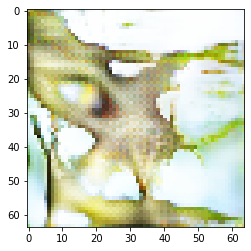

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 16

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.596516132354736 sec
Gen loss: 7.132738703957741, Gen valid loss: 1.5897602873442942, Gen attr loss: 5.542978406921635, Disc valid loss: 0.9611192334312088, Disc valid real loss: 0.49674661372735246, Disc valid fake loss: 0.4643726199461516, Disc attr loss: 9.908654756339262, Disc attr real loss: 4.365676349417627, Disc attr fake loss: 5.542978406921635
Time for epoch 2 is 38.5245680809021 sec
Gen loss: 7.121548100861753, Gen valid loss: 1.5591138413928065, Gen attr loss: 5.562434274006665, Disc valid loss: 0.9640828282206362, Disc valid real loss: 0.49567997128498265, Disc valid fake loss: 0.4684028569760361, Disc attr loss: 9.92469204796685, Disc attr real loss: 4.362257773960186, Disc attr fake loss: 5.562434274006665
Time for epoch 3 is 38.885732889175415 sec
Gen loss: 7.132701156585197, Gen valid loss: 1.5440992194462597, Gen attr loss: 5.58860

Time for epoch 23 is 38.877713441848755 sec
Gen loss: 7.14546154766548, Gen valid loss: 1.5703893622085654, Gen attr loss: 5.575072183841613, Disc valid loss: 0.9743820961897935, Disc valid real loss: 0.5062226989081882, Disc valid fake loss: 0.4681593978469611, Disc attr loss: 9.931205044593915, Disc attr real loss: 4.356132860752302, Disc attr fake loss: 5.575072183841613
Time for epoch 24 is 38.65372371673584 sec
Gen loss: 7.152292937767215, Gen valid loss: 1.5698396713753058, Gen attr loss: 5.582453272853117, Disc valid loss: 0.9610268203869745, Disc valid real loss: 0.49950841028838944, Disc valid fake loss: 0.46151841042164543, Disc attr loss: 9.937233805333372, Disc attr real loss: 4.354780532480255, Disc attr fake loss: 5.582453272853117
Time for epoch 25 is 38.71443295478821 sec
Gen loss: 7.160044414241139, Gen valid loss: 1.584934569632781, Gen attr loss: 5.575109863022802, Disc valid loss: 0.9602393848786186, Disc valid real loss: 0.49698688998454954, Disc valid fake loss: 0

Time for epoch 45 is 38.496941804885864 sec
Gen loss: 7.18010180946288, Gen valid loss: 1.5735048333480752, Gen attr loss: 5.6065969712689, Disc valid loss: 0.9666693596658991, Disc valid real loss: 0.4964732902482919, Disc valid fake loss: 0.47019606909454675, Disc attr loss: 9.953247319715134, Disc attr real loss: 4.346650348446233, Disc attr fake loss: 5.6065969712689
Time for epoch 46 is 38.68137168884277 sec
Gen loss: 7.143486913303696, Gen valid loss: 1.5595566757972323, Gen attr loss: 5.583930244290732, Disc valid loss: 0.9720701987181253, Disc valid real loss: 0.4992678343926665, Disc valid fake loss: 0.47280236335627757, Disc attr loss: 9.926498573970019, Disc attr real loss: 4.342568329679287, Disc attr fake loss: 5.583930244290732
Time for epoch 47 is 38.580140352249146 sec
Gen loss: 7.16292621126666, Gen valid loss: 1.554368726283231, Gen attr loss: 5.608557494352181, Disc valid loss: 0.9754618684127725, Disc valid real loss: 0.5019651388895867, Disc valid fake loss: 0.4734

Time for epoch 67 is 38.54631304740906 sec
Gen loss: 7.157560039664995, Gen valid loss: 1.5811655850914437, Gen attr loss: 5.576394436482168, Disc valid loss: 0.9579495947535445, Disc valid real loss: 0.4913860512619742, Disc valid fake loss: 0.46656354381463067, Disc attr loss: 9.911849023849983, Disc attr real loss: 4.335454587367815, Disc attr fake loss: 5.576394436482168
Time for epoch 68 is 38.53443622589111 sec
Gen loss: 7.160323910596894, Gen valid loss: 1.5778947981392466, Gen attr loss: 5.582429118272735, Disc valid loss: 0.965551741077971, Disc valid real loss: 0.4926479201975877, Disc valid fake loss: 0.47290381781130947, Disc attr loss: 9.91803949376755, Disc attr real loss: 4.335610375494815, Disc attr fake loss: 5.582429118272735
Time for epoch 69 is 38.50037884712219 sec
Gen loss: 7.151716431305014, Gen valid loss: 1.5764189031389024, Gen attr loss: 5.575297515889816, Disc valid loss: 0.9652755202316656, Disc valid real loss: 0.4977390156367284, Disc valid fake loss: 0.4

Time for epoch 89 is 38.434234380722046 sec
Gen loss: 7.1819682121276855, Gen valid loss: 1.6072938245163377, Gen attr loss: 5.574674391165012, Disc valid loss: 0.960653768160802, Disc valid real loss: 0.4983614486084398, Disc valid fake loss: 0.46229232092536887, Disc attr loss: 9.899330330411916, Disc attr real loss: 4.324655939246904, Disc attr fake loss: 5.574674391165012
Time for epoch 90 is 38.44272017478943 sec
Gen loss: 7.1857869980458, Gen valid loss: 1.5777974073802876, Gen attr loss: 5.607989592926935, Disc valid loss: 0.9585331820537081, Disc valid real loss: 0.495075730288901, Disc valid fake loss: 0.46345745184557224, Disc attr loss: 9.93273194114044, Disc attr real loss: 4.324742348213506, Disc attr fake loss: 5.607989592926935
Time for epoch 91 is 38.44202733039856 sec
Gen loss: 7.137235305496671, Gen valid loss: 1.5663543574532197, Gen attr loss: 5.570880948043451, Disc valid loss: 0.972713364979762, Disc valid real loss: 0.4996377992920759, Disc valid fake loss: 0.473

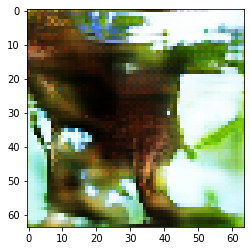

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 17

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.73911213874817 sec
Gen loss: 7.152492126475182, Gen valid loss: 1.5686087013906256, Gen attr loss: 5.583883422500072, Disc valid loss: 0.9721178008611933, Disc valid real loss: 0.4990517560867113, Disc valid fake loss: 0.473066041624643, Disc attr loss: 9.904237889985081, Disc attr real loss: 4.320354467485009, Disc attr fake loss: 5.583883422500072
Time for epoch 2 is 38.579395055770874 sec
Gen loss: 7.133145204404506, Gen valid loss: 1.559921612584494, Gen attr loss: 5.5732235856818635, Disc valid loss: 0.965494627713511, Disc valid real loss: 0.4980476198157644, Disc valid fake loss: 0.4674470086246325, Disc attr loss: 9.891588342222095, Disc attr real loss: 4.318364756540231, Disc attr fake loss: 5.5732235856818635
Time for epoch 3 is 38.624671459198 sec
Gen loss: 7.15234151829872, Gen valid loss: 1.568657427622374, Gen attr loss: 5.58368409035

Time for epoch 23 is 38.79331707954407 sec
Gen loss: 7.1450243719871125, Gen valid loss: 1.5736823605328072, Gen attr loss: 5.571341995301285, Disc valid loss: 0.9703218798004192, Disc valid real loss: 0.4993484801231684, Disc valid fake loss: 0.47097339886959977, Disc attr loss: 9.88125531072539, Disc attr real loss: 4.309913315424105, Disc attr fake loss: 5.571341995301285
Time for epoch 24 is 38.79512572288513 sec
Gen loss: 7.1619581284561775, Gen valid loss: 1.5770101479398526, Gen attr loss: 5.584947996992406, Disc valid loss: 0.9601007551358645, Disc valid real loss: 0.4920904640421312, Disc valid fake loss: 0.4680102881054245, Disc attr loss: 9.891754263461767, Disc attr real loss: 4.306806266469361, Disc attr fake loss: 5.584947996992406
Time for epoch 25 is 39.054057598114014 sec
Gen loss: 7.141673474453976, Gen valid loss: 1.5815280087918124, Gen attr loss: 5.560145464692981, Disc valid loss: 0.9631899892476193, Disc valid real loss: 0.49642519269209245, Disc valid fake loss:

Time for epoch 45 is 39.026074171066284 sec
Gen loss: 7.16433072154761, Gen valid loss: 1.5836755147148278, Gen attr loss: 5.580655198756272, Disc valid loss: 0.9546066648591824, Disc valid real loss: 0.4894118679732811, Disc valid fake loss: 0.46519479696666644, Disc attr loss: 9.876080564690152, Disc attr real loss: 4.295425365933881, Disc attr fake loss: 5.580655198756272
Time for epoch 46 is 39.04774475097656 sec
Gen loss: 7.143434568472348, Gen valid loss: 1.5600806280849426, Gen attr loss: 5.583353939418224, Disc valid loss: 0.9784738024075826, Disc valid real loss: 0.5027867365012647, Disc valid fake loss: 0.47568706703702934, Disc attr loss: 9.87952253295154, Disc attr real loss: 4.2961685935333165, Disc attr fake loss: 5.583353939418224
Time for epoch 47 is 39.01696443557739 sec
Gen loss: 7.1814916980298875, Gen valid loss: 1.5801528469333803, Gen attr loss: 5.601338864665045, Disc valid loss: 0.9599786578478205, Disc valid real loss: 0.4940563394286768, Disc valid fake loss: 

Time for epoch 67 is 39.1106390953064 sec
Gen loss: 7.1587852061925545, Gen valid loss: 1.5809976867220912, Gen attr loss: 5.577787523347188, Disc valid loss: 0.9647268515615283, Disc valid real loss: 0.49361672076752516, Disc valid fake loss: 0.47111012877487557, Disc attr loss: 9.866449027849729, Disc attr real loss: 4.288661504502542, Disc attr fake loss: 5.577787523347188
Time for epoch 68 is 39.16386914253235 sec
Gen loss: 7.143184526179864, Gen valid loss: 1.5783285477620153, Gen attr loss: 5.564855981325392, Disc valid loss: 0.9672362833488278, Disc valid real loss: 0.5007435181115055, Disc valid fake loss: 0.46649276499502706, Disc attr loss: 9.85553284583053, Disc attr real loss: 4.290676864505137, Disc attr fake loss: 5.564855981325392
Time for epoch 69 is 39.02884387969971 sec
Gen loss: 7.161843151257936, Gen valid loss: 1.5695505723720644, Gen attr loss: 5.592292571132422, Disc valid loss: 0.9627295008842861, Disc valid real loss: 0.4968865836054329, Disc valid fake loss: 0

Time for epoch 89 is 39.08580780029297 sec
Gen loss: 7.133348256914919, Gen valid loss: 1.5727409886796946, Gen attr loss: 5.5606072692044055, Disc valid loss: 0.962809421182648, Disc valid real loss: 0.49274550907334014, Disc valid fake loss: 0.47006391105936146, Disc attr loss: 9.840094890051741, Disc attr real loss: 4.279487620847335, Disc attr fake loss: 5.5606072692044055
Time for epoch 90 is 39.02087736129761 sec
Gen loss: 7.179668578998183, Gen valid loss: 1.588591232532408, Gen attr loss: 5.591077339358446, Disc valid loss: 0.9591937504486663, Disc valid real loss: 0.49473186511657424, Disc valid fake loss: 0.46446188484750145, Disc attr loss: 9.871559443512583, Disc attr real loss: 4.280482104154137, Disc attr fake loss: 5.591077339358446
Time for epoch 91 is 39.301637411117554 sec
Gen loss: 7.143554284320614, Gen valid loss: 1.5660562676788992, Gen attr loss: 5.577498031502493, Disc valid loss: 0.9713410365226146, Disc valid real loss: 0.49785769712634204, Disc valid fake los

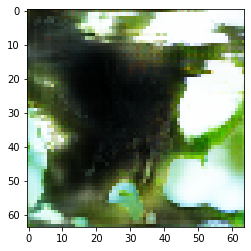

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 18

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 39.16863203048706 sec
Gen loss: 7.15167086428097, Gen valid loss: 1.6034706533762821, Gen attr loss: 5.5482002209195596, Disc valid loss: 0.96152557218624, Disc valid real loss: 0.4972170764191687, Disc valid fake loss: 0.4643084950401854, Disc attr loss: 9.819944134249596, Disc attr real loss: 4.271743913330036, Disc attr fake loss: 5.5482002209195596
Time for epoch 2 is 39.12493634223938 sec
Gen loss: 7.144687377340425, Gen valid loss: 1.5900790571843382, Gen attr loss: 5.554608319186906, Disc valid loss: 0.9607300165545972, Disc valid real loss: 0.4964135315037032, Disc valid fake loss: 0.4643164851316592, Disc attr loss: 9.830802315941995, Disc attr real loss: 4.276193996755088, Disc attr fake loss: 5.554608319186906
Time for epoch 3 is 39.13655710220337 sec
Gen loss: 7.128629052542089, Gen valid loss: 1.576493754296445, Gen attr loss: 5.552135308

Time for epoch 23 is 39.161375284194946 sec
Gen loss: 7.137182234425532, Gen valid loss: 1.5557788956133007, Gen attr loss: 5.5814033459195596, Disc valid loss: 0.977032481008752, Disc valid real loss: 0.5036758642371107, Disc valid fake loss: 0.4733566183061781, Disc attr loss: 9.842025195356953, Disc attr real loss: 4.260621849437393, Disc attr fake loss: 5.5814033459195596
Time for epoch 24 is 39.14713764190674 sec
Gen loss: 7.107975618626044, Gen valid loss: 1.5698409943076652, Gen attr loss: 5.53813462593368, Disc valid loss: 0.9598439287363998, Disc valid real loss: 0.4964078467712816, Disc valid fake loss: 0.4634360817228229, Disc attr loss: 9.797266993096205, Disc attr real loss: 4.259132367162524, Disc attr fake loss: 5.53813462593368
Time for epoch 25 is 39.135348081588745 sec
Gen loss: 7.13224009123598, Gen valid loss: 1.574646840250589, Gen attr loss: 5.5575932590619015, Disc valid loss: 0.9659063864529618, Disc valid real loss: 0.49856502366905936, Disc valid fake loss: 0.

Time for epoch 45 is 39.094412088394165 sec
Gen loss: 7.131420297028249, Gen valid loss: 1.5801526375902377, Gen attr loss: 5.551267649746199, Disc valid loss: 0.962120183922734, Disc valid real loss: 0.49658004951670887, Disc valid fake loss: 0.4655401352136762, Disc attr loss: 9.803489460208551, Disc attr real loss: 4.252221810462352, Disc attr fake loss: 5.551267649746199
Time for epoch 46 is 39.0399055480957 sec
Gen loss: 7.150095413693891, Gen valid loss: 1.5772636330870755, Gen attr loss: 5.572831785775782, Disc valid loss: 0.9729224466049897, Disc valid real loss: 0.5025228679503205, Disc valid fake loss: 0.4703995805930316, Disc attr loss: 9.823913740271799, Disc attr real loss: 4.251081954496017, Disc attr fake loss: 5.572831785775782
Time for epoch 47 is 38.97670340538025 sec
Gen loss: 7.108460979409981, Gen valid loss: 1.565355220138219, Gen attr loss: 5.543105752164433, Disc valid loss: 0.9655666457928294, Disc valid real loss: 0.4972995854005581, Disc valid fake loss: 0.46

Time for epoch 67 is 38.97521471977234 sec
Gen loss: 7.150926371576986, Gen valid loss: 1.6005935817553099, Gen attr loss: 5.550332803390213, Disc valid loss: 0.9533327372093511, Disc valid real loss: 0.48942228150238515, Disc valid fake loss: 0.4639104574030331, Disc attr loss: 9.789591358283024, Disc attr real loss: 4.239258554892811, Disc attr fake loss: 5.550332803390213
Time for epoch 68 is 38.97912573814392 sec
Gen loss: 7.1296393658087505, Gen valid loss: 1.5714653013198356, Gen attr loss: 5.558174072565425, Disc valid loss: 0.9694815987170873, Disc valid real loss: 0.5007470113636678, Disc valid fake loss: 0.4687345883226007, Disc attr loss: 9.795930331961573, Disc attr real loss: 4.237756259396147, Disc attr fake loss: 5.558174072565425
Time for epoch 69 is 39.05826807022095 sec
Gen loss: 7.161362048410142, Gen valid loss: 1.5886357127812496, Gen attr loss: 5.572726329813805, Disc valid loss: 0.96029677833645, Disc valid real loss: 0.49623718599316874, Disc valid fake loss: 0.

Time for epoch 89 is 39.04947018623352 sec
Gen loss: 7.148632350652845, Gen valid loss: 1.5710752459399422, Gen attr loss: 5.577557108912687, Disc valid loss: 0.9617440863676511, Disc valid real loss: 0.49517820642246463, Disc valid fake loss: 0.4665658791375354, Disc attr loss: 9.804100091541363, Disc attr real loss: 4.226542982628675, Disc attr fake loss: 5.577557108912687
Time for epoch 90 is 39.06765413284302 sec
Gen loss: 7.151397241163383, Gen valid loss: 1.5993435021015363, Gen attr loss: 5.552053722908826, Disc valid loss: 0.9577775416658499, Disc valid real loss: 0.49079105556818853, Disc valid fake loss: 0.4669864831901178, Disc attr loss: 9.776621352689377, Disc attr real loss: 4.22456762978055, Disc attr fake loss: 5.552053722908826
Time for epoch 91 is 39.185757875442505 sec
Gen loss: 7.106285911911549, Gen valid loss: 1.5595292560453338, Gen attr loss: 5.546756639713195, Disc valid loss: 0.9702229746958104, Disc valid real loss: 0.4974486016161074, Disc valid fake loss: 0

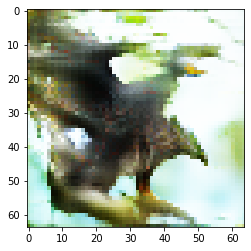

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Starting checkpoint 19

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time for epoch 1 is 38.985806465148926 sec
Gen loss: 7.173307380055993, Gen valid loss: 1.595608291264149, Gen attr loss: 5.577699086207361, Disc valid loss: 0.9609988601550177, Disc valid real loss: 0.49476059261699357, Disc valid fake loss: 0.46623826640731275, Disc attr loss: 9.79565490164408, Disc attr real loss: 4.217955815436717, Disc attr fake loss: 5.577699086207361
Time for epoch 2 is 38.97047686576843 sec
Gen loss: 7.1558202456652635, Gen valid loss: 1.5801785308817216, Gen attr loss: 5.575641708322334, Disc valid loss: 0.96209191500656, Disc valid real loss: 0.4950378549292805, Disc valid fake loss: 0.46705405943115874, Disc attr loss: 9.789574759439402, Disc attr real loss: 4.213933051117068, Disc attr fake loss: 5.575641708322334
Time for epoch 3 is 39.03244161605835 sec
Gen loss: 7.120426233544905, Gen valid loss: 1.5781817762509271, Gen attr loss: 5.542244

Time for epoch 23 is 39.18141317367554 sec
Gen loss: 7.141567077740098, Gen valid loss: 1.586485386540896, Gen attr loss: 5.555081685384114, Disc valid loss: 0.9652997982211229, Disc valid real loss: 0.4919564616550921, Disc valid fake loss: 0.4733433350314939, Disc attr loss: 9.759939133636351, Disc attr real loss: 4.204857448252236, Disc attr fake loss: 5.555081685384114
Time for epoch 24 is 39.068811655044556 sec
Gen loss: 7.167051021968769, Gen valid loss: 1.5941358795010947, Gen attr loss: 5.5729151314836205, Disc valid loss: 0.9562785284629036, Disc valid real loss: 0.49718871777296714, Disc valid fake loss: 0.4590898111745271, Disc attr loss: 9.772590729602307, Disc attr real loss: 4.199675598118686, Disc attr fake loss: 5.5729151314836205
Time for epoch 25 is 38.98250341415405 sec
Gen loss: 7.140993539556901, Gen valid loss: 1.6056468037731926, Gen attr loss: 5.535346743214098, Disc valid loss: 0.9506624791680313, Disc valid real loss: 0.4878092615746547, Disc valid fake loss: 

Time for epoch 45 is 38.88821601867676 sec
Gen loss: 7.137001066026972, Gen valid loss: 1.5758715864765611, Gen attr loss: 5.561129489888343, Disc valid loss: 0.9605223878935424, Disc valid real loss: 0.49440580800296813, Disc valid fake loss: 0.4661165765792051, Disc attr loss: 9.75458336005689, Disc attr real loss: 4.193453870168546, Disc attr fake loss: 5.561129489888343
Time for epoch 46 is 39.08957600593567 sec
Gen loss: 7.158523231340941, Gen valid loss: 1.5773697936437963, Gen attr loss: 5.581153431558997, Disc valid loss: 0.9669060731321816, Disc valid real loss: 0.4958069801815157, Disc valid fake loss: 0.47109909254684035, Disc attr loss: 9.772022035386827, Disc attr real loss: 4.19086860382783, Disc attr fake loss: 5.581153431558997
Time for epoch 47 is 39.17946457862854 sec
Gen loss: 7.153869778806278, Gen valid loss: 1.5602048490105607, Gen attr loss: 5.593664938195288, Disc valid loss: 0.9666986832127662, Disc valid real loss: 0.49743652828340607, Disc valid fake loss: 0.

Time for epoch 67 is 39.057427167892456 sec
Gen loss: 7.15825942538295, Gen valid loss: 1.5893352351537564, Gen attr loss: 5.568924206059154, Disc valid loss: 0.9637044097996017, Disc valid real loss: 0.4942320241999174, Disc valid fake loss: 0.4694723857612145, Disc attr loss: 9.750591735529706, Disc attr real loss: 4.181667529470552, Disc attr fake loss: 5.568924206059154
Time for epoch 68 is 39.05651140213013 sec
Gen loss: 7.164195786969771, Gen valid loss: 1.605950438233249, Gen attr loss: 5.558245357782214, Disc valid loss: 0.9592012979473848, Disc valid real loss: 0.4915786454994181, Disc valid fake loss: 0.46762265256911434, Disc attr loss: 9.741014335213638, Disc attr real loss: 4.182768977431424, Disc attr fake loss: 5.558245357782214
Time for epoch 69 is 39.039313077926636 sec
Gen loss: 7.136955522263277, Gen valid loss: 1.5704633427183157, Gen attr loss: 5.566492182129444, Disc valid loss: 0.9637251875910978, Disc valid real loss: 0.49272006499735, Disc valid fake loss: 0.47

Time for epoch 89 is 39.01888561248779 sec
Gen loss: 7.170191388789231, Gen valid loss: 1.5926183135851935, Gen attr loss: 5.577573073265675, Disc valid loss: 0.9629444024427151, Disc valid real loss: 0.4984051851722283, Disc valid fake loss: 0.46453921823966793, Disc attr loss: 9.745367899173644, Disc attr real loss: 4.1677948259079685, Disc attr fake loss: 5.577573073265675
Time for epoch 90 is 38.96078824996948 sec
Gen loss: 7.143729420535287, Gen valid loss: 1.584759341345893, Gen attr loss: 5.558970072728186, Disc valid loss: 0.9578284619623406, Disc valid real loss: 0.4957137632014629, Disc valid fake loss: 0.4621147008607704, Disc attr loss: 9.728207604348821, Disc attr real loss: 4.169237531620635, Disc attr fake loss: 5.558970072728186
Time for epoch 91 is 38.97163724899292 sec
Gen loss: 7.2126478515666355, Gen valid loss: 1.5953102376725938, Gen attr loss: 5.617337617124646, Disc valid loss: 0.9631592687875598, Disc valid real loss: 0.4948780005217245, Disc valid fake loss: 0

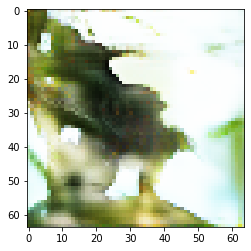

In [131]:
next_starting_checkpoint, totalepochs, warmup = long_train(starting_checkpoint=next_starting_checkpoint, 
                                      num_checkpoints=5, 
                                      checkpoint_interval=100, 
                                      g_hist=gen_loss_hist, 
                                      g_valid_hist=gen_valid_loss_hist,
                                      g_attr_hist=gen_attr_loss_hist,
                                      d_hist=disc_loss_hist,
                                      d_real_hist=disc_loss_real_hist,
                                      d_fake_hist=disc_loss_fake_hist,
                                      d_attr_real_hist=disc_attr_loss_real_hist,
                                      d_attr_fake_hist=disc_attr_loss_fake_hist,
                                      noise=noise300,
                                      caption=caption,
                                      save_files=True,
                                      warmup=warmup)

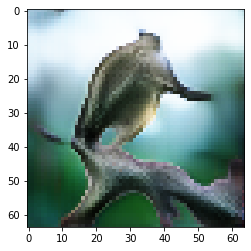

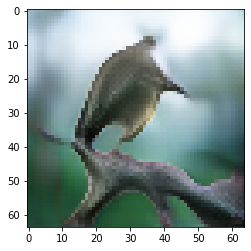

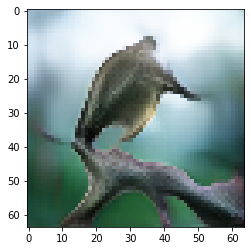

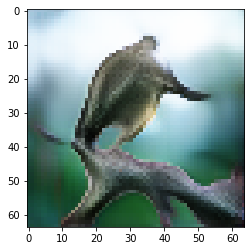

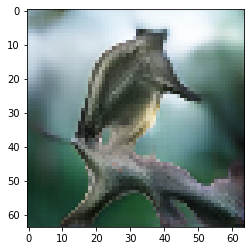

In [132]:
captions = train_captions[np.random.choice(range(len(train_captions)), 5, replace=False)]
# attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
# tempnoise = np.random.normal(0, 1, 300)
for i in range(5):
#     tempnoise = np.random.normal(0, 1, 300)

    
#     attrs[2] += 1.
    
    generated_image = generator.predict([np.array([tempnoise]), np.array([1.*captions[i]])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
# noise = np.random.normal(0, 1, 300)
for i in range(15):
    attrs = [0. for _ in range(34)]
#     attrs = np.round(np.random.uniform(0, 1, 10)) * 3
#     attrs[5] -= 1
    attrs[i] += 20
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    plt.imshow(unnormalize_img(generated_image))
    plt.title(str(attrs))
    plt.show()
#     ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
tempnoise = np.random.normal(0, 1, 300)
for i, ax in enumerate(grid):
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs[i]])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
attrs[20:] = 0.
for i, ax in enumerate(grid):
#     attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[21] = (3.*x)
    attrs[27] = (3.*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )
attrs[20:] = 0.
for i, ax in enumerate(grid):
#     attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[21] = (3.*x)
    attrs[27] = (3.*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
for i, ax in enumerate(grid):
    attrs = [0. for _ in range(34)]
    x = i % 5
    y = (i // 5) % 5
    attrs[11] = (4*x)
    attrs[12] = (10*y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),
                 axes_pad=0.1,  # pad between axes in inch.
                 )

attrs = train_attrs[np.random.choice(range(len(train_attrs)), 9, replace=False)]
for i, ax in enumerate(grid):
    attrs = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    x = i % 5
    y = (i // 5) % 5
    attrs[2] = (x)
    attrs[4] = (y)
    generated_image = generator.predict([np.array([tempnoise]), np.array([attrs])] )[0]
    ax.imshow(unnormalize_img(generated_image))

In [ ]:
savednoise = tempnoise.copy()
# tempnoise = savednoise.copy()

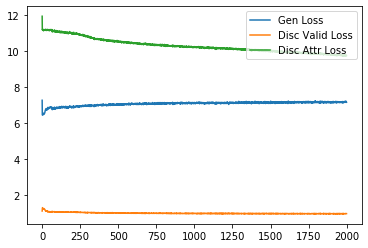

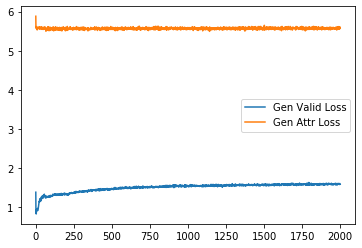

In [ ]:
plot_save_dir = 'bird-gan-attributes-split-captions'

from operator import add
disc_attr_loss_hist = list( map(add, disc_attr_loss_real_hist, disc_attr_loss_fake_hist) )

plt.plot(gen_loss_hist)
plt.plot(disc_loss_hist)
plt.plot(disc_attr_loss_hist)

plt.legend(['Gen Loss','Disc Valid Loss', 'Disc Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses.png')
plt.show()

plt.plot(gen_valid_loss_hist)
plt.plot(gen_attr_loss_hist)
plt.legend(['Gen Valid Loss', 'Gen Attr Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_valid_attr_losses.png')
plt.show()

plt.plot(gen_loss_hist - np.mean(gen_loss_hist))
plt.plot(disc_loss_hist - np.mean(disc_loss_hist))
plt.plot(disc_attr_loss_hist - np.mean(disc_attr_loss_hist))
plt.legend(['Gen Loss Normalized','Disc Valid Loss Normalized', 'Disc Attr Loss Normalized'])
plt.savefig('./results/plots/'+plot_save_dir+'/g_d_losses_normalized.png')
plt.show()

plt.plot(disc_loss_real_hist)
plt.plot(disc_loss_fake_hist)
plt.legend(['Disc Real Loss','Disc Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_real_fake_losses.png')
plt.show()

plt.plot(disc_attr_loss_real_hist)
# plt.show()
plt.plot(disc_attr_loss_fake_hist)
plt.legend(['Disc Attribute Real Loss', 'Disc Attribute Fake Loss'])
plt.savefig('./results/plots/'+plot_save_dir+'/d_attribute_real_fake_losses.png')
plt.show()


In [106]:
prediction = discriminator_attr.predict(np.array([train_imgs[6]]))[0]
print(np.where(np.round(prediction) == 1))

(array([6, 9], dtype=int64),)


In [107]:
prediction = discriminator_attr.predict(np.array([train_imgs[344]]))[0]
print(np.where(np.round(prediction) == 1))

(array([6, 9], dtype=int64),)


In [110]:
d = dict.fromkeys([i for i in range(10)], 0)
prediction = discriminator_attr.predict(np.array(train_imgs))
prediction = np.round(prediction)
for p in prediction:
    p = np.where(p == 1)
    for i in p[0]:
        d[i] += 1
    
# for im in train_imgs:
#     for p in prediction[0]:
#         d[p] += 1

<BarContainer object of 10 artists>

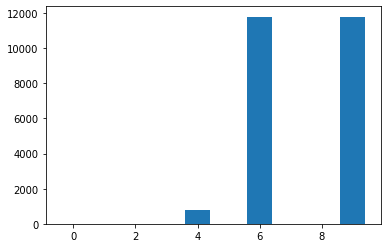

In [111]:
plt.bar([x for x in range(10)], d.values())

<BarContainer object of 10 artists>

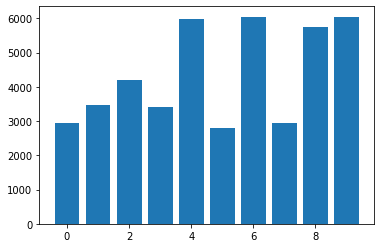

In [113]:
plt.bar([x for x in range(10)], np.sum(train_attrs, axis=0))

In [70]:
train_captions[0]

array([-0.18826514, -0.23472328, -0.12803595, ...,  0.12800913,
        0.02513238,  0.19851945], dtype=float32)

In [71]:
caption_dict

{'Black_Footed_Albatross_0001_796111.txt': array([[-0.18826514, -0.23472328, -0.12803595, ...,  0.12800913,
          0.02513238,  0.19851945],
        [-0.3302567 , -0.28500614, -0.32292345, ..., -0.02912699,
          0.10806333,  0.15853517],
        [-0.5187231 , -0.38658214,  0.21717855, ...,  0.28599   ,
          0.29024145,  0.02387192],
        ...,
        [-0.29444316, -0.23436053, -0.23513633, ...,  0.0480585 ,
         -0.06545841,  0.31954053],
        [-0.35894018, -0.22262608, -0.3199642 , ...,  0.22132255,
          0.00229979,  0.09849496],
        [-0.23260315, -0.3989193 , -0.24021944, ...,  0.3009826 ,
         -0.04468243, -0.2228742 ]], dtype=float32),
 'Black_Footed_Albatross_0002_55.txt': array([[-0.17825212, -0.43948334, -0.04086634, ...,  0.15317403,
         -0.01451942,  0.06955066],
        [-0.38912624, -0.30230877,  0.11085515, ...,  0.06703687,
         -0.05267586,  0.18188606],
        [-0.435142  , -0.21649379, -0.35719672, ...,  0.13075821,
        